# Load the CSV File

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # For safely evaluating strings of lists
import seaborn as sns
%matplotlib inline

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('../data_1st-experiment.csv', sep=';', quotechar='"')


# Explore and Preprocess the Data

In [20]:
# Display the first few rows
df.head()


,model,coordinates,zoomedEntities,url,limit,assistantInstructions,extraInstructions,prompt,response,durationCB,durationOAI,duration,waiting,logTime
0,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,75.9,"[4842.5, 5080.5]","[6363.5999999940395, 6601.5999999940395]",8,2024-10-16T10:27:25.241Z
1,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,83.4,"[2456.5, 2697]","[3704.9000000059605, 3945.4000000059605]",6,2024-10-16T10:27:39.094Z
2,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,67.6,[2364.5],[3293.100000023842],6,2024-10-16T10:27:45.670Z
3,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,99.1,"[3794.399999976158, 4054.199999988079]","[4833.0999999940395, 5092.9000000059605]",2,2024-10-16T10:27:52.862Z
4,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,68.7,[3398.699999988079],[4321.899999976158],6,2024-10-16T10:28:01.661Z


## Convert some data types.

Example durationOAI, duration, limit

In [21]:
# Function to safely evaluate strings of lists
def parse_list_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


# Parse the columns
df['durationOAI_list'] = parse_list_column(df['durationOAI'])
df['duration_list'] = parse_list_column(df['duration'])

# For simplicity, let's extract the mean duration from the lists
df['durationOAI_mean'] = df['durationOAI_list'].apply(lambda x: sum(x) / len(x)
                                                      if x else None)
df['duration_mean'] = df['duration_list'].apply(lambda x: sum(x) / len(x)
                                                if x else None)

# For simplicity, let's extract the max and min
df['durationOAI_max'] = df['durationOAI_list'].apply(lambda x: max(x)
                                                     if x else None)
df['duration_max'] = df['duration_list'].apply(lambda x: max(x) if x else None)
df['durationOAI_min'] = df['durationOAI_list'].apply(lambda x: min(x)
                                                     if x else None)
df['duration_min'] = df['duration_list'].apply(lambda x: min(x) if x else None)

In [22]:
df['logTime'] = pd.to_datetime(df['logTime'])

In [23]:
df['limit'] = pd.to_numeric(df['limit'])

In [24]:
df.head()

,model,coordinates,zoomedEntities,url,limit,assistantInstructions,extraInstructions,prompt,response,durationCB,...,waiting,logTime,durationOAI_list,duration_list,durationOAI_mean,duration_mean,durationOAI_max,duration_max,durationOAI_min,duration_min
0,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,75.9,...,8,2024-10-16 10:27:25.241000+00:00,"[4842.5, 5080.5]","[6363.5999999940395, 6601.5999999940395]",4961.50,6482.60,5080.5,6601.6,4842.5,6363.6
1,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,83.4,...,6,2024-10-16 10:27:39.094000+00:00,"[2456.5, 2697]","[3704.9000000059605, 3945.4000000059605]",2576.75,3825.15,2697.0,3945.4,2456.5,3704.9
2,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,67.6,...,6,2024-10-16 10:27:45.670000+00:00,[2364.5],[3293.100000023842],2364.50,3293.10,2364.5,3293.1,2364.5,3293.1
3,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,99.1,...,2,2024-10-16 10:27:52.862000+00:00,"[3794.399999976158, 4054.199999988079]","[4833.0999999940395, 5092.9000000059605]",3924.30,4963.00,4054.2,5092.9,3794.4,4833.1
4,gpt-4o,"[-3.7794685363769536, 40.32063471629669, -3.62...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,68.7,...,6,2024-10-16 10:28:01.661000+00:00,[3398.699999988079],[4321.899999976158],3398.70,4321.90,3398.7,4321.9,3398.7,4321.9


# Visualize the Data


## Plot Duration vs. Input Size

Now, let's plot the mean duration against the input size (limit) for different questions 

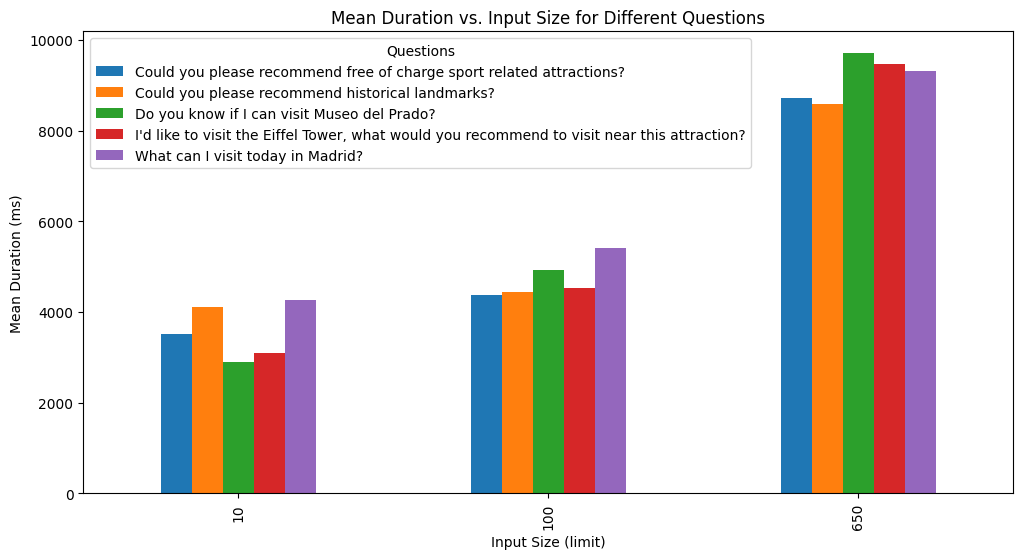

In [25]:
# Group the data by 'limit' and 'prompt'
grouped = df.groupby(['limit', 'prompt'])

# Calculate mean durations
mean_durations = grouped['duration_mean'].mean().reset_index()

# Pivot the table to have prompts as columns
pivot_table = mean_durations.pivot(index='limit', columns='prompt', values='duration_mean')

# Plot the data
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Duration vs. Input Size for Different Questions')
plt.xlabel('Input Size (limit)')
plt.ylabel('Mean Duration (ms)')
plt.legend(title='Questions')
plt.show()


## Plot Duration Over Time

If you want to see how the durations change over time for different input sizes, you can do the following:

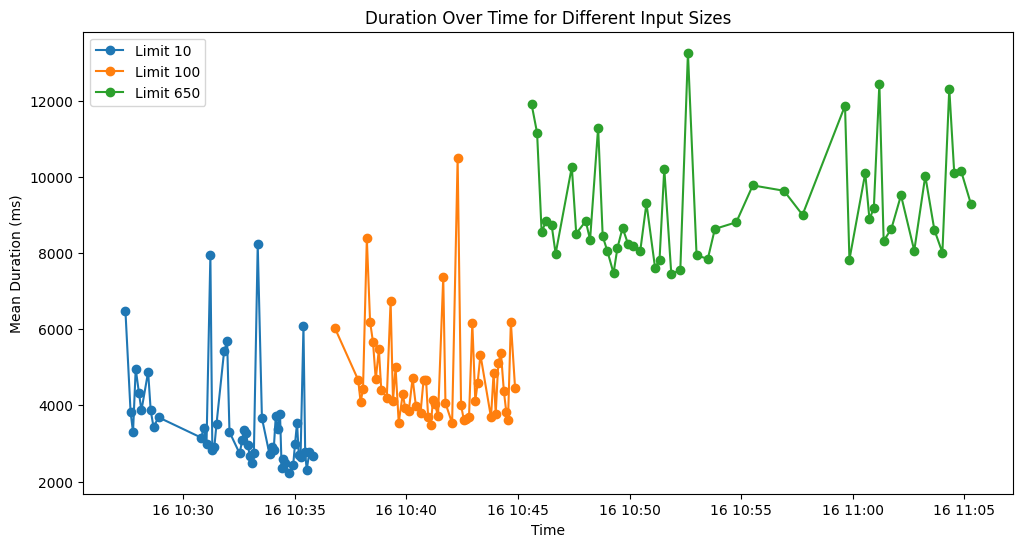

In [26]:
# Sort the DataFrame by 'logTime'
df_sorted = df.sort_values('logTime')

# Plot duration over time for each input size
plt.figure(figsize=(12, 6))

for limit_value in df_sorted['limit'].unique():
    subset = df_sorted[df_sorted['limit'] == limit_value]
    plt.plot(subset['logTime'], subset['duration_mean'], marker='o', label=f'Limit {limit_value}')

plt.title('Duration Over Time for Different Input Sizes')
plt.xlabel('Time')
plt.ylabel('Mean Duration (ms)')
plt.legend()
plt.show()


## Plot Duration for Different Questions

To analyze the duration for each question regardless of the input size:

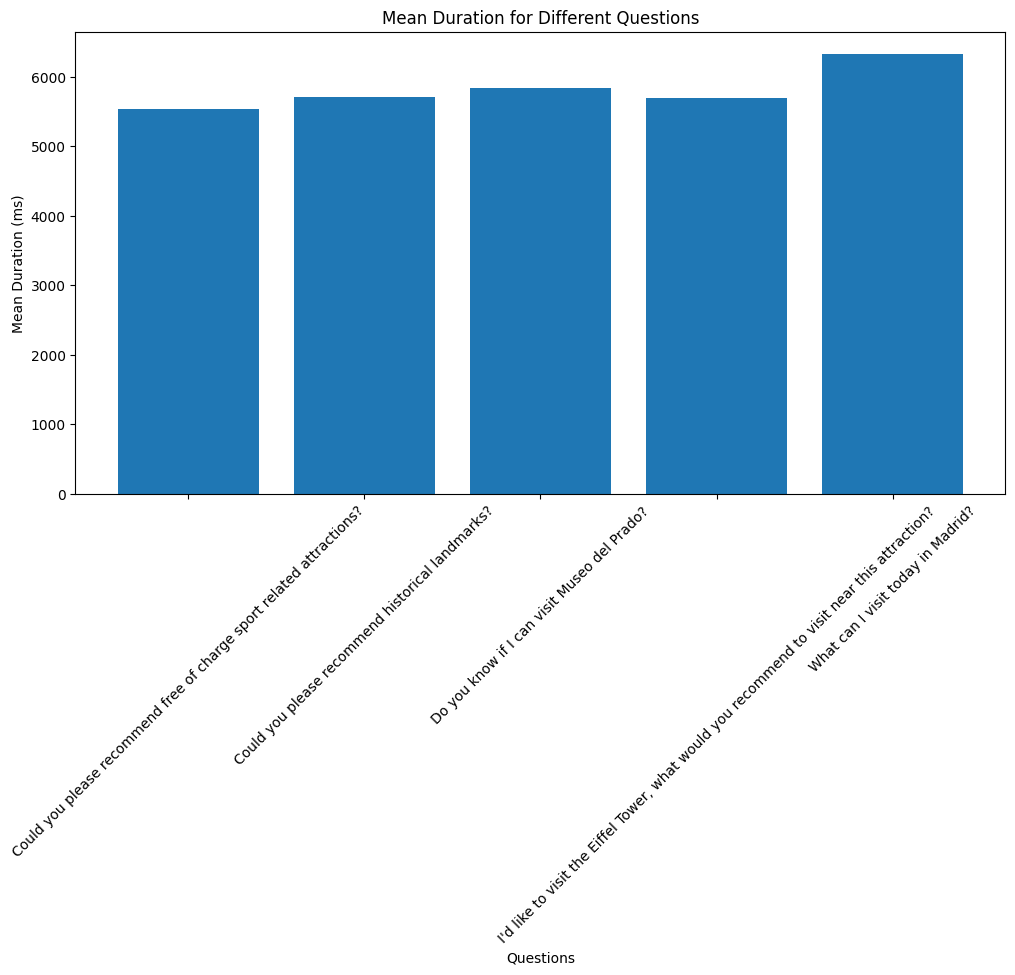

In [27]:
# Group by 'prompt' and calculate mean duration
prompt_durations = df.groupby('prompt')['duration_mean'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(prompt_durations['prompt'], prompt_durations['duration_mean'])
plt.title('Mean Duration for Different Questions')
plt.xlabel('Questions')
plt.ylabel('Mean Duration (ms)')
plt.xticks(rotation=45)
plt.show()


# Additional Analysis

## Plot OpenAI Duration vs. Callback Duration

If you want to compare durationOAI_mean and durationCB:

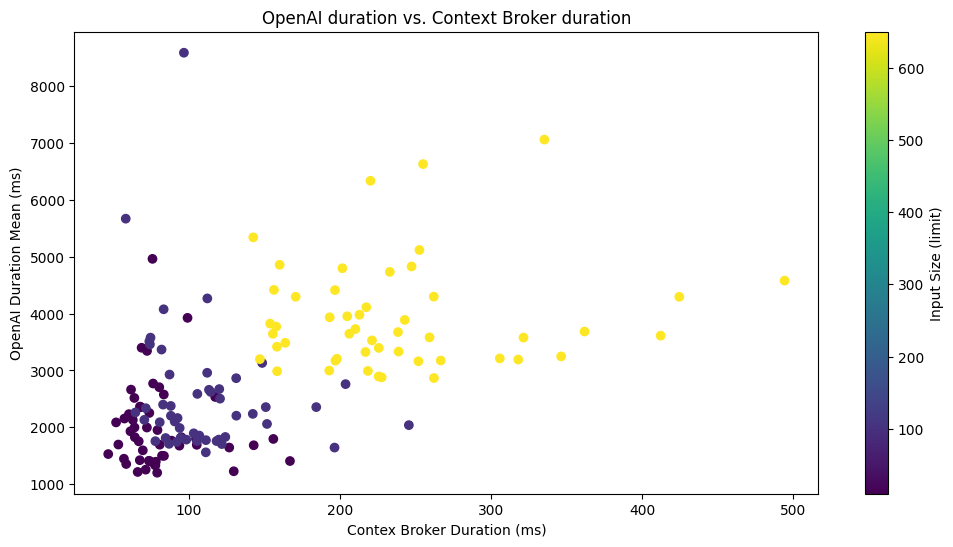

In [28]:
# Ensure 'durationCB' is numeric
df['durationCB'] = pd.to_numeric(df['durationCB'])

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['durationCB'], df['durationOAI_mean'], c=df['limit'], cmap='viridis')
plt.title('OpenAI duration vs. Context Broker duration')
plt.xlabel('Contex Broker Duration (ms)')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.colorbar(label='Input Size (limit)')
plt.show()


# Dispersion Analysis

## Expand the Durations into Separate Rows

In [29]:
# Function to expand the list of durations into separate rows
def expand_durations(df, duration_col, label):
    # Create a DataFrame where each duration in the list becomes a row
    expanded_df = df.apply(lambda row: pd.Series(row[duration_col]), axis=1) \
                    .stack() \
                    .reset_index(level=1, drop=True) \
                    .to_frame(label)
    # Add other columns for grouping
    expanded_df['limit'] = df.loc[expanded_df.index, 'limit'].values
    expanded_df['prompt'] = df.loc[expanded_df.index, 'prompt'].values
    expanded_df['logTime'] = df.loc[expanded_df.index, 'logTime'].values
    return expanded_df

# Expand the durations
durationOAI_expanded = expand_durations(df, 'durationOAI_list', 'OpenAI Duration')
duration_expanded = expand_durations(df, 'duration_list', 'Total Duration')

# Expand 'durationCB' (since it's a single value per row)
durationCB_expanded = df[['durationCB', 'limit', 'prompt', 'logTime']]
durationCB_expanded = durationCB_expanded.rename(columns={'durationCB': 'Context Broker Duration'})


## Combine All Durations into One DataFrame

In [30]:
# Combine all durations
all_durations = pd.concat([
    durationCB_expanded.melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration'),
    durationOAI_expanded.reset_index().melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration'),
    duration_expanded.reset_index().melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration')
], ignore_index=True)


## Overall Distribution

First, let's create boxplots to visualize the overall distribution of each duration type.

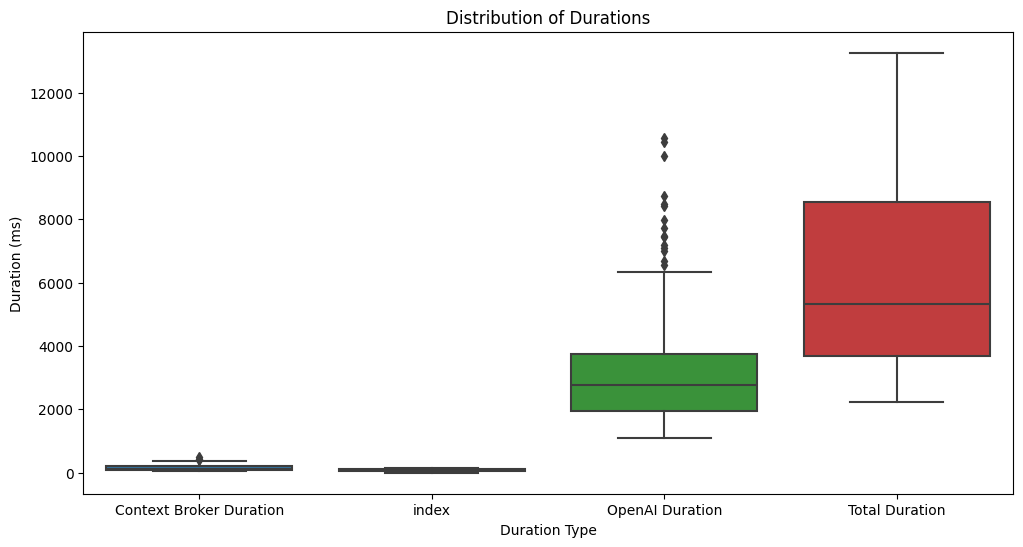

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', data=all_durations)
plt.title('Distribution of Durations')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.show()


## Distribution by Input Size (limit)
Next, we'll create boxplots grouped by the limit to see how the input size affects the durations.

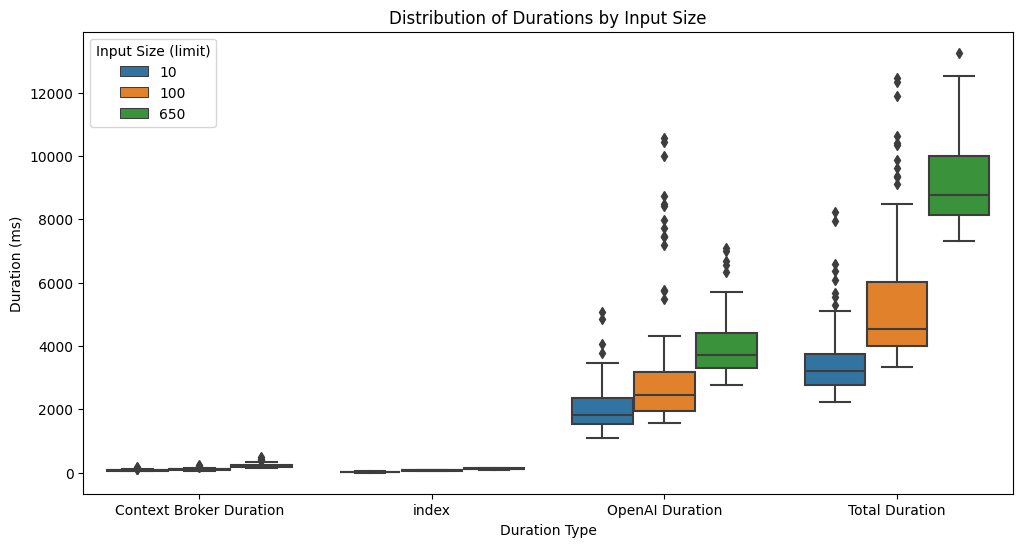

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', hue='limit', data=all_durations)
plt.title('Distribution of Durations by Input Size')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.legend(title='Input Size (limit)')
plt.show()


## Distribution by Questions (prompt)
If you want to see how different questions affect the durations, you can group the data by prompt.

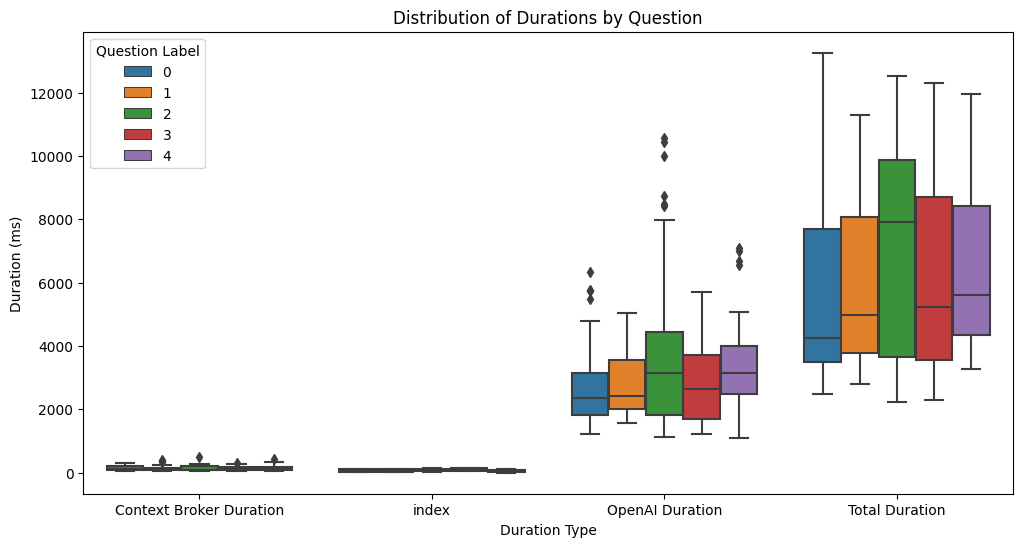

In [36]:
# Since prompts can be lengthy, assign shorter labels
all_durations['Prompt Label'] = all_durations['prompt'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', hue='Prompt Label', data=all_durations)
plt.title('Distribution of Durations by Question')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.legend(title='Question Label')
plt.show()


# Create Violin Plots

## Overall Distribution

In [44]:
summary_stats = all_durations.groupby(['Duration Type'])['Duration'].describe()
print(summary_stats)

                         count         mean          std     min       25%  \
Duration Type                                                                
Context Broker Duration  150.0   142.598667    84.572670    46.6    77.875   
OpenAI Duration          263.0  3152.830418  1654.523446  1084.3  1936.050   
Total Duration           263.0  6151.466160  2805.750922  2230.6  3701.250   
index                    526.0    77.380228    42.210627     0.0    44.250   

                             50%       75%      max  
Duration Type                                        
Context Broker Duration   112.15   196.925    494.3  
OpenAI Duration          2779.40  3756.250  10560.6  
Total Duration           5331.80  8534.100  13262.5  
index                      80.00   113.000    149.0  


In [47]:
all_durations['Duration Type'].unique()

array(['Context Broker Duration', 'index', 'OpenAI Duration',
       'Total Duration'], dtype=object)

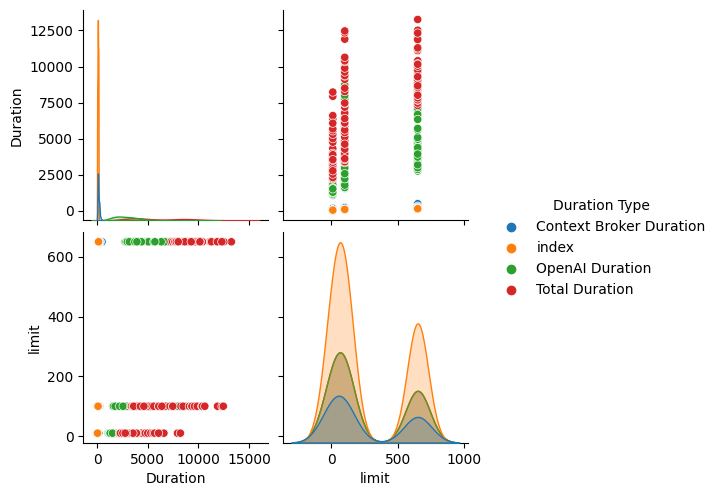

Duration Type
Context Broker Duration    0.801896
OpenAI Duration            0.395631
Total Duration             0.791486
index                      0.861314
dtype: float64


In [48]:
# Convert 'limit' to numeric if it's not already
all_durations['limit'] = pd.to_numeric(all_durations['limit'])

# Plot scatter plots
sns.pairplot(all_durations, vars=['Duration', 'limit'], hue='limit')
plt.show()

# Calculate correlation coefficients
correlations = all_durations.groupby('Duration Type').apply(lambda x: x['Duration'].corr(x['limit']))
print(correlations)


# Calculate Input Size in Bytes

## Identify PoIs Data

First, we need to determine where the PoIs data is stored in your DataFrame. Based on your CSV sample, it appears that the PoIs are in the zoomedEntities column, which contains a list of PoI IDs.

However, to accurately calculate the input size, we need the actual content of the PoIs that are included in the input sent to OpenAI. If the detailed PoIs data is stored in another column or needs to be fetched, please adjust the code accordingly.

For this example, I'll assume that the PoIs data is represented in the extraInstructions column (since it mentions "Here are the PoIs:") and that it includes the PoIs data.

## Concatenate the Input Components

We'll concatenate the relevant columns into a single string for each row and calculate its size in bytes.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming 'df' is your DataFrame
# Ensure 'zoomedEntities' is parsed if it contains list data
def parse_list_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df['zoomedEntities_list'] = parse_list_column(df['zoomedEntities'])

# If PoIs data is available in another column, include it
# For now, we'll include 'zoomedEntities_list' as part of the input
df['PoIs_string'] = df['zoomedEntities_list'].apply(lambda x: ', '.join(x))

# Concatenate the input components
df['input_text'] = (
    df['assistantInstructions'] + ' ' +
    df['extraInstructions'] + ' ' +
    df['prompt'] + ' ' +
    df['PoIs_string']
)

# Calculate the size in bytes
df['input_size_bytes'] = df['input_text'].apply(lambda x: len(x.encode('utf-8')))


## Calculate Number of Tokens

Please, see: https://github.com/openai/tiktoken

Since OpenAI's API processes text based on tokens, calculating the number of tokens may provide better insight.

In [55]:
# Install tiktoken if not already installed
# !pip install tiktoken

import tiktoken

# Choose the appropriate encoding based on the model
encoding = tiktoken.encoding_for_model('gpt-4')

# Function to calculate the number of tokens
def count_tokens(text):
    return len(encoding.encode(text))

# Calculate number of tokens
df['input_tokens'] = df['input_text'].apply(count_tokens)


# Perform Correlation Analysis

## Compute Correlation Coefficients

### Correlation with Input Size in Bytes

In [56]:
# Correlation between input size and OpenAI duration
corr_input_OAI = df['input_size_bytes'].corr(df['durationOAI_mean'])

# Correlation between input size and Context Broker duration
corr_input_CB = df['input_size_bytes'].corr(df['durationCB'])

# Correlation between input size and total duration
corr_input_total = df['input_size_bytes'].corr(df['duration_mean'])

print(f"Correlation between Input Size (Bytes) and OpenAI Duration: {corr_input_OAI:.4f}")
print(f"Correlation between Input Size (Bytes) and Context Broker Duration: {corr_input_CB:.4f}")
print(f"Correlation between Input Size (Bytes) and Total Duration: {corr_input_total:.4f}")


Correlation between Input Size (Bytes) and OpenAI Duration: 0.6388
Correlation between Input Size (Bytes) and Context Broker Duration: 0.8017
Correlation between Input Size (Bytes) and Total Duration: 0.8691


### Correlation with Number of Tokens

In [57]:
# Correlation between number of tokens and OpenAI duration
corr_tokens_OAI = df['input_tokens'].corr(df['durationOAI_mean'])

# Correlation between number of tokens and Context Broker duration
corr_tokens_CB = df['input_tokens'].corr(df['durationCB'])
dd
# Correlation between number of tokens and total duration
corr_tokens_total = df['input_tokens'].corr(df['duration_mean'])

print(f"Correlation between Input Tokens and OpenAI Duration: {corr_tokens_OAI:.4f}")
print(f"Correlation between Input Tokens and Context Broker Duration: {corr_tokens_CB:.4f}")
print(f"Correlation between Input Tokens and Total Duration: {corr_tokens_total:.4f}")


Correlation between Input Tokens and OpenAI Duration: 0.6392
Correlation between Input Tokens and Context Broker Duration: 0.8018
Correlation between Input Tokens and Total Duration: 0.8693


#  Visualize the Relationships

## Scatter Plots with Regression Lines
### OpenAI Duration vs. Input Size

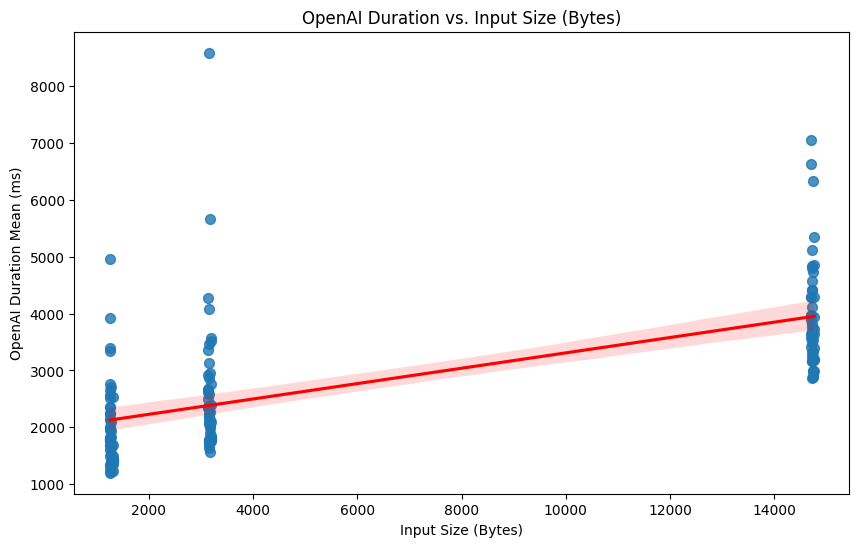

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='durationOAI_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('OpenAI Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.show()


### Context Broker Duration vs. Input Size

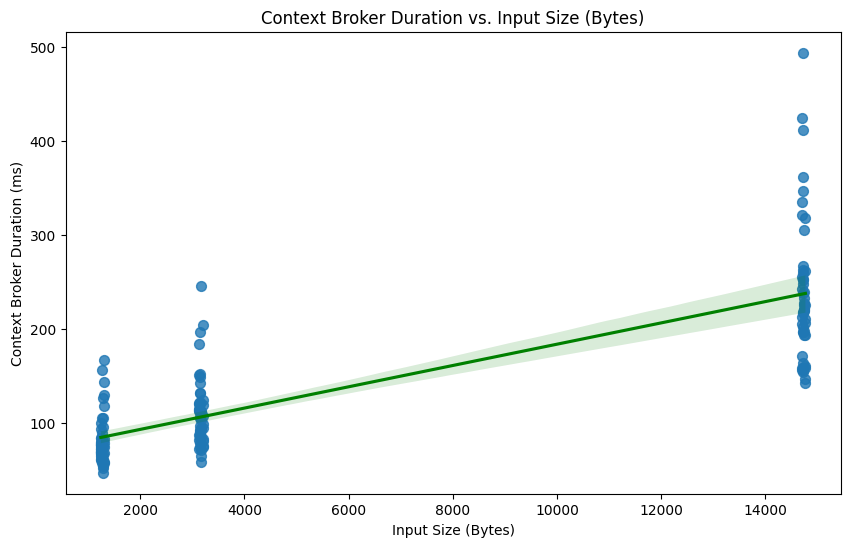

In [59]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='durationCB', data=df, scatter_kws={'s': 50}, line_kws={'color': 'green'})
plt.title('Context Broker Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('Context Broker Duration (ms)')
plt.show()


### Total Duration vs. Input Size

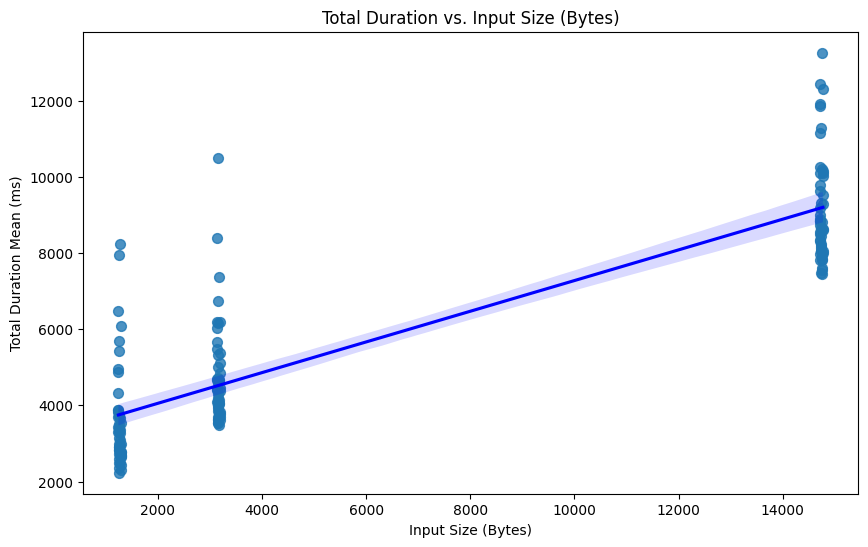

In [60]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='duration_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Total Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('Total Duration Mean (ms)')
plt.show()


## Duration vs. Number of Tokens

### Duration vs. Number of Tokens

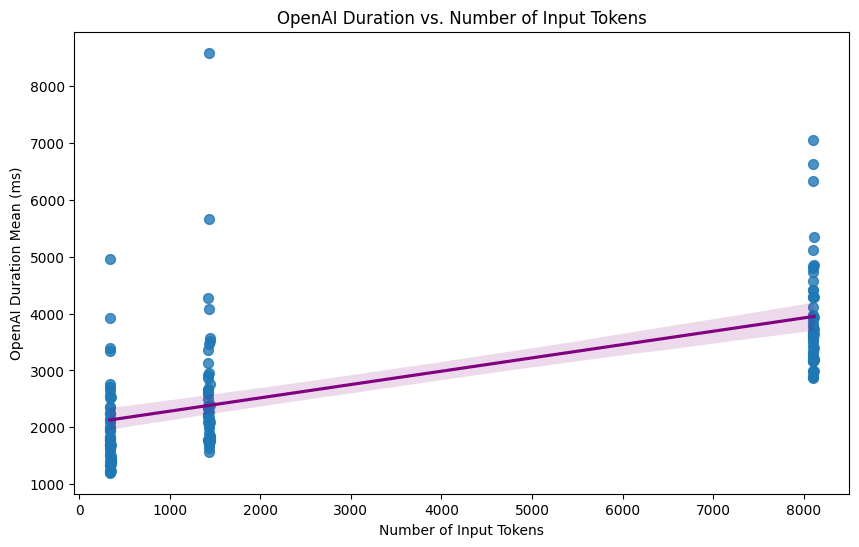

In [61]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_tokens', y='durationOAI_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'purple'})
plt.title('OpenAI Duration vs. Number of Input Tokens')
plt.xlabel('Number of Input Tokens')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.show()


# Additional Analysis

## Multiple Regression Analysis
To see how input size and other variables together affect the durations, perform a multiple regression.

In [63]:
import statsmodels.api as sm

# Prepare the predictor variables
X = df[['input_size_bytes', 'limit']]
X = sm.add_constant(X)  # Adds a constant term to the predictors

# OpenAI Duration Model
y_OAI = df['durationOAI_mean']
model_OAI = sm.OLS(y_OAI, X).fit()
print("OpenAI Duration Regression Results:")
print(model_OAI.summary())

# Context Broker Duration Model
y_CB = df['durationCB']
model_CB = sm.OLS(y_CB, X).fit()
print("\nContext Broker Duration Regression Results:")
print(model_CB.summary())

# Total Duration Model
y_total = df['duration_mean']
model_total = sm.OLS(y_total, X).fit()
print("\nTotal Duration Regression Results:")
print(model_total.summary())


OpenAI Duration Regression Results:
                            OLS Regression Results                            
Dep. Variable:       durationOAI_mean   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     58.32
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.26e-19
Time:                        16:08:07   Log-Likelihood:                -1239.6
No. Observations:                 150   AIC:                             2485.
Df Residuals:                     147   BIC:                             2494.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cons

Interpretation

    Coefficients: Indicate the change in duration per unit change in input size or limit.
    P-values: Show the statistical significance of each predictor (values below 0.05 are typically considered significant).
    R-squared: Represents the proportion of the variance in the dependent variable that's predictable from the independent variables.